### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.


In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

In [121]:
# Carga el dataset
df = pd.read_csv("./dataset/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico



1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


In [122]:
# Convierte 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])
grouped_data = df[['Date', 'AveragePrice']].groupby('Date').mean()
grouped_data

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


In [123]:
# Genera la serie temporal
# [period: Expected samples in a full cycle / repetition of the seasonality component]
decomposition = seasonal_decompose(grouped_data['AveragePrice'], model='additive', period=52)

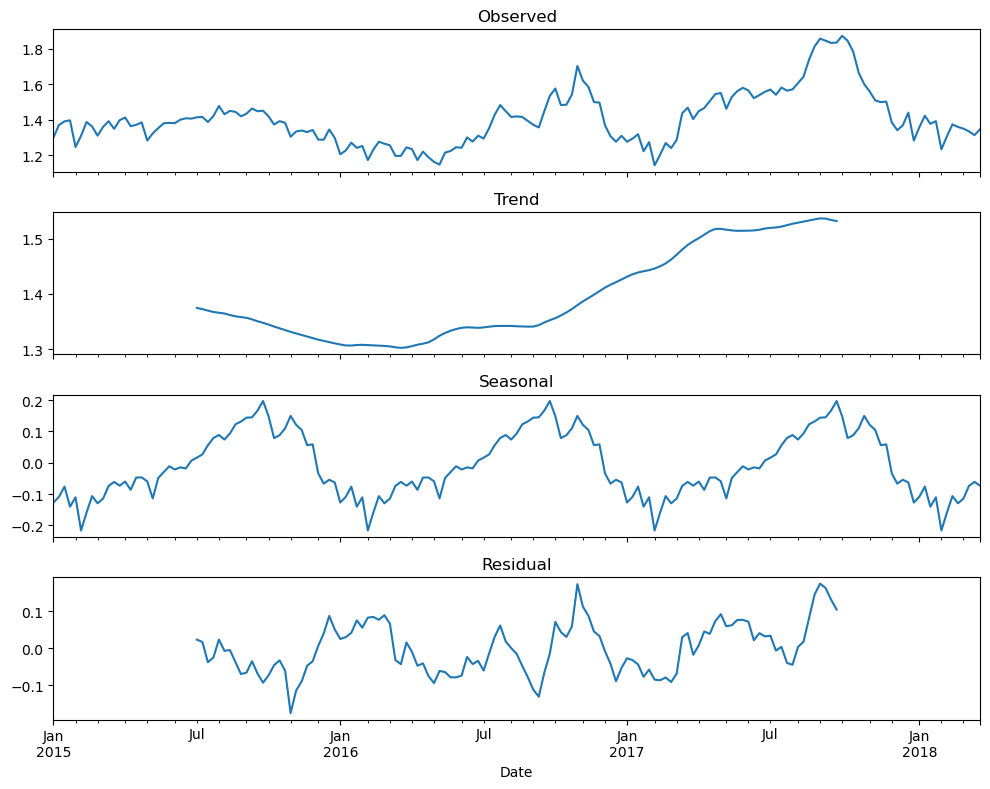

In [124]:
# Dibuja los componentes de la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')

plt.tight_layout()
plt.show()


2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

In [125]:
subset = ['region','Date','AveragePrice']
grouped_data = df[subset].groupby(['region','Date']).mean().reset_index()
grouped_data

,region,Date,AveragePrice
0,Albany,2015-01-04,1.505
1,Albany,2015-01-11,1.505
2,Albany,2015-01-18,1.550
3,Albany,2015-01-25,1.475
4,Albany,2015-02-01,1.410
...,...,...,...
9121,WestTexNewMexico,2018-02-25,1.225
9122,WestTexNewMexico,2018-03-04,1.210
9123,WestTexNewMexico,2018-03-11,1.250
9124,WestTexNewMexico,2018-03-18,1.220


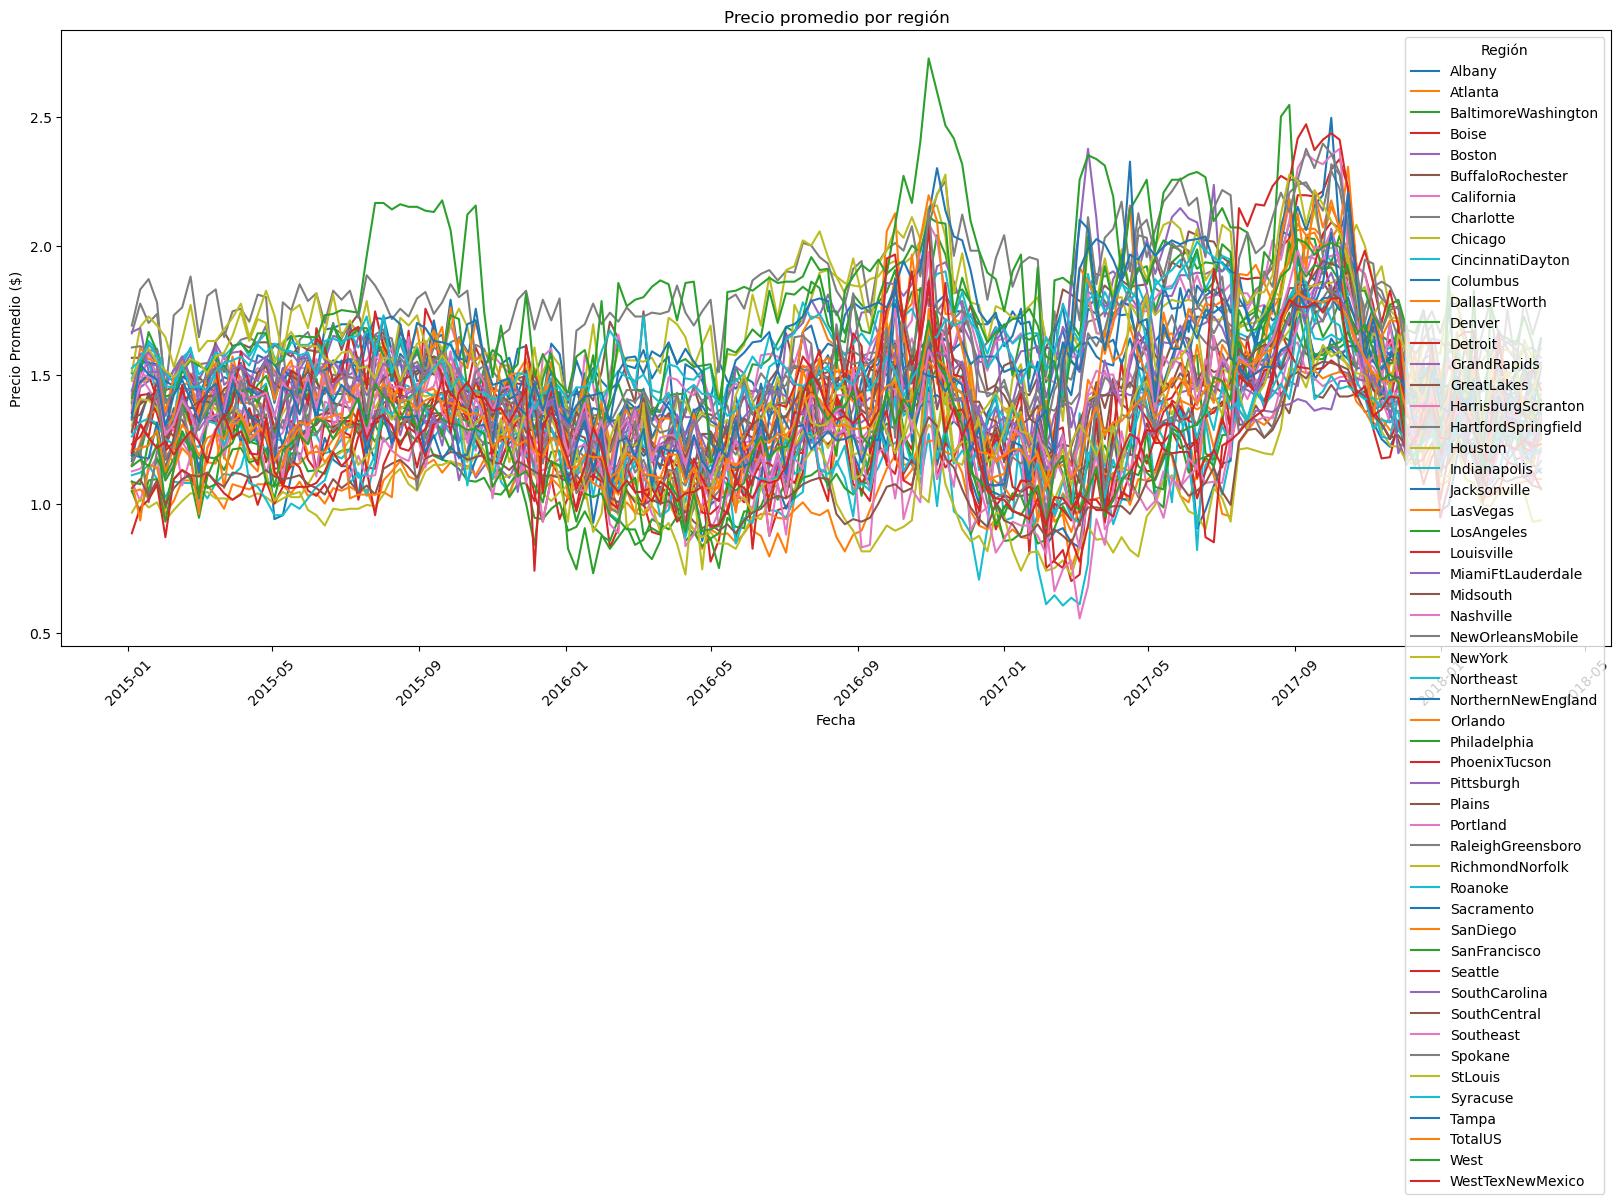

In [126]:
# Gráfica
plt.figure(figsize=(20, 8))
for region in grouped_data['region'].unique():
    df_region = grouped_data[grouped_data['region'] == region]
    plt.plot(df_region['Date'], df_region['AveragePrice'], label=region)
plt.title('Precio promedio por región')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.show()


3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


In [127]:
subset = ['region','Date','AveragePrice']
grouped_data = df[subset].groupby(pd.Grouper(key="Date", freq="ME"))['AveragePrice'].mean()
grouped_data

Date
2015-01-31    1.365046
2015-02-28    1.326944
2015-03-31    1.361981
2015-04-30    1.383449
2015-05-31    1.344685
2015-06-30    1.399074
2015-07-31    1.409444
2015-08-31    1.444481
2015-09-30    1.449144
2015-10-31    1.391968
2015-11-30    1.330611
2015-12-31    1.305244
2016-01-31    1.240185
2016-02-29    1.237106
2016-03-31    1.224213
2016-04-30    1.205023
2016-05-31    1.199722
2016-06-30    1.283056
2016-07-31    1.401333
2016-08-31    1.411111
2016-09-30    1.427870
2016-10-31    1.557093
2016-11-30    1.550023
2016-12-31    1.315995
2017-01-31    1.277500
2017-02-28    1.214792
2017-03-31    1.398935
2017-04-30    1.502611
2017-05-31    1.532593
2017-06-30    1.545395
2017-07-31    1.564926
2017-08-31    1.698958
2017-09-30    1.840949
2017-10-31    1.752444
2017-11-30    1.517292
2017-12-31    1.363852
2018-01-31    1.387431
2018-02-28    1.318704
2018-03-31    1.336458
Freq: ME, Name: AveragePrice, dtype: float64

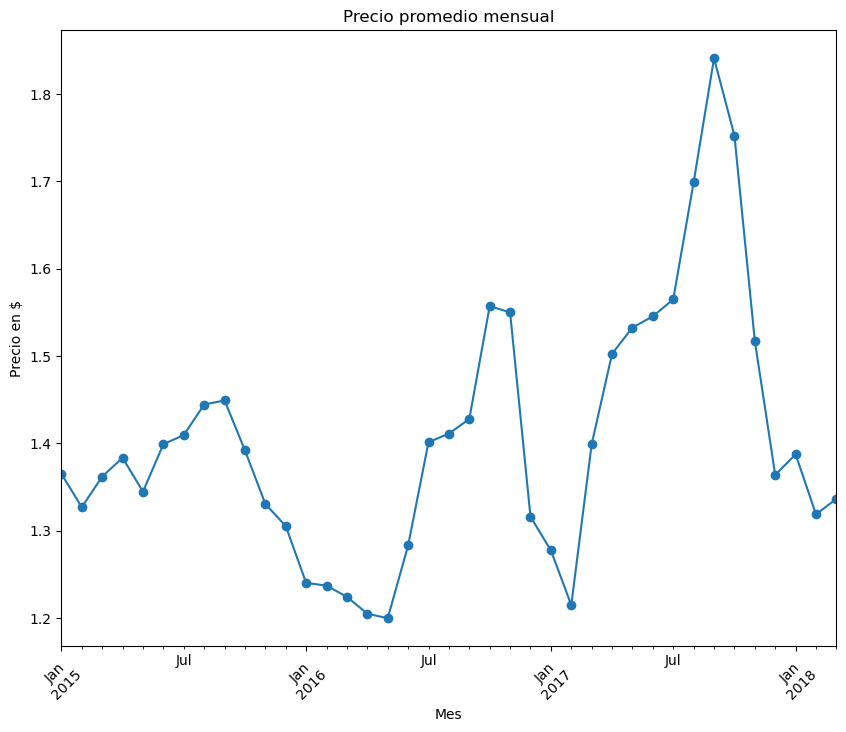

In [128]:
plt.figure(figsize=(10,8))
grouped_data.plot(marker='o')
plt.title('Precio promedio mensual')
plt.xlabel('Mes')
plt.ylabel('Precio en $')
plt.xticks(rotation=45)
plt.show()



4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.


In [129]:
grouped_data = df[['Date','Total Volume']].groupby('Date').sum()
grouped_data

,Total Volume
Date,
2015-01-04,8.467434e+07
2015-01-11,7.855581e+07
2015-01-18,7.838878e+07
2015-01-25,7.646628e+07
2015-02-01,1.194532e+08
...,...
2018-02-25,1.092314e+08
2018-03-04,1.118449e+08
2018-03-11,1.114652e+08


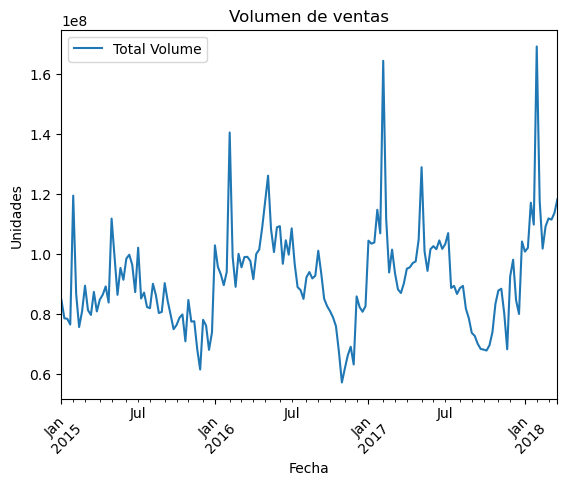

In [130]:
grouped_data.plot()
plt.title('Volumen de ventas')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.xticks(rotation=45)
plt.show()


5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.


In [131]:
grouped_data = df[['AveragePrice','year']].groupby('year').mean()
grouped_data

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


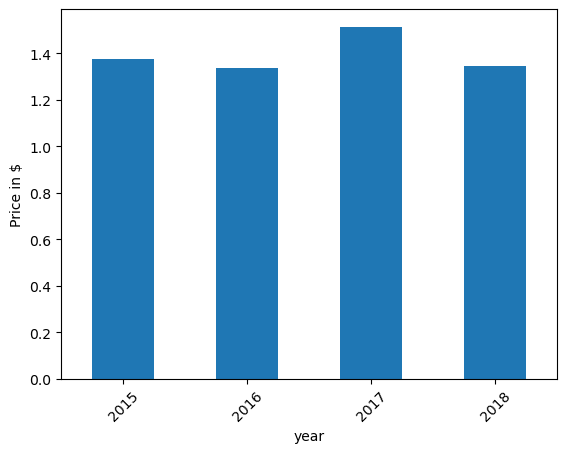

In [132]:
grouped_data.plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("Average price per year")
plt.ylabel("Year")
plt.ylabel("Price in $")
plt.legend().remove()